In [1]:
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Загружаем данные

In [2]:
path_to_train='Train/'
path_to_test='Test/'

In [3]:
X_train=np.load(path_to_train+"X_train.npy")
y_train=np.load(path_to_train+"y_train.npy")
X_test=np.load(path_to_test+"X_test.npy")
y_test=np.load(path_to_test+"y_test.npy")

In [4]:
print(X_train.shape, y_train.shape)

(19267, 12000) (19267,)


In [5]:
pd.array(y_train).value_counts()

0    8564
2    4698
1    3706
3    1819
4     480
dtype: Int64

Классы несбалансированы. Будем с этим бороться

In [9]:
from imblearn.over_sampling import SMOTE

nm=SMOTE()
X_train, y_train=nm.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)

(42820, 12000) (42820,)


In [10]:
pd.array(y_train).value_counts()

0    8564
1    8564
2    8564
4    8564
3    8564
dtype: Int64

## Обучение

In [11]:
def train(epoch,my_model):
    losses=[]
    my_model.train()
    for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        output = my_model(X_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(X_batch), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        losses.append(loss.data.numpy())
    return np.mean(losses)

## Тестирование

In [12]:
def test(my_model):
    my_model.eval()
    test_loss = 0
    correct = 0
    for X_batch, y_batch in test_loader:
        output = my_model(X_batch)
        test_loss += loss_function(output, y_batch).data
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(y_batch.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader)
    acc=correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return acc,test_loss

## Матрица ошибок

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

def print_confusion_matrix(model, X, y):
    model.eval()
    y_pred = model(torch.Tensor(X)).data.numpy().argmax(axis = 1)
    print(confusion_matrix(y, y_pred))
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy = {accuracy}")
    return accuracy

In [14]:
batch_size=64
input_shape=X_train.shape[1]

In [16]:
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.LongTensor(y_train)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)


# Model1

In [17]:
model1=nn.Sequential()
model1.add_module("dense1",nn.Linear(input_shape,128))
model1.add_module("relu1",nn.ReLU())
model1.add_module("dense2",nn.Linear(128,128))
model1.add_module("relu2",nn.ReLU())
model1.add_module("dense3", nn.Linear(128,5))
model1.add_module("softmax",nn.Softmax(dim=1))

In [18]:
loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters())

In [19]:
loss_train=[]
loss_test=[]
acc=[]
for epoch in range(200):
    loss_train.append(train(epoch + 1,model1))
    acc_,test_loss_=test(model1)
    acc.append(acc_)
    loss_test.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.610266
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.393026
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.312292
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.297104
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.328124
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.230979
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.302812

Test set: Average loss: 1.5041, Accuracy: 830/2163 (38.37%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.208775
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.204707
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.190789
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.190825
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.185916
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.191026
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.155270

Test set: Average loss: 1.4806, Accuracy: 889/2163 (41.10%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.189001
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.154214
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.113985
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.1

Train Epoch: 21 [6400/42820 (15%)]	Loss: 0.972890
Train Epoch: 21 [12800/42820 (30%)]	Loss: 0.994070
Train Epoch: 21 [19200/42820 (45%)]	Loss: 0.988728
Train Epoch: 21 [25600/42820 (60%)]	Loss: 1.048151
Train Epoch: 21 [32000/42820 (75%)]	Loss: 0.987628
Train Epoch: 21 [38400/42820 (90%)]	Loss: 0.956380

Test set: Average loss: 1.4454, Accuracy: 986/2163 (45.58%)

Train Epoch: 22 [0/42820 (0%)]	Loss: 1.018209
Train Epoch: 22 [6400/42820 (15%)]	Loss: 1.043757
Train Epoch: 22 [12800/42820 (30%)]	Loss: 0.953696
Train Epoch: 22 [19200/42820 (45%)]	Loss: 1.001016
Train Epoch: 22 [25600/42820 (60%)]	Loss: 1.003914
Train Epoch: 22 [32000/42820 (75%)]	Loss: 1.076839
Train Epoch: 22 [38400/42820 (90%)]	Loss: 0.964951

Test set: Average loss: 1.4275, Accuracy: 1027/2163 (47.48%)

Train Epoch: 23 [0/42820 (0%)]	Loss: 1.035289
Train Epoch: 23 [6400/42820 (15%)]	Loss: 1.051927
Train Epoch: 23 [12800/42820 (30%)]	Loss: 0.967669
Train Epoch: 23 [19200/42820 (45%)]	Loss: 1.062155
Train Epoch: 23 [2560

Train Epoch: 41 [6400/42820 (15%)]	Loss: 1.029833
Train Epoch: 41 [12800/42820 (30%)]	Loss: 0.998817
Train Epoch: 41 [19200/42820 (45%)]	Loss: 1.014904
Train Epoch: 41 [25600/42820 (60%)]	Loss: 0.977481
Train Epoch: 41 [32000/42820 (75%)]	Loss: 0.967969
Train Epoch: 41 [38400/42820 (90%)]	Loss: 1.000795

Test set: Average loss: 1.4358, Accuracy: 1010/2163 (46.69%)

Train Epoch: 42 [0/42820 (0%)]	Loss: 1.008287
Train Epoch: 42 [6400/42820 (15%)]	Loss: 0.968758
Train Epoch: 42 [12800/42820 (30%)]	Loss: 1.014083
Train Epoch: 42 [19200/42820 (45%)]	Loss: 1.032771
Train Epoch: 42 [25600/42820 (60%)]	Loss: 0.998584
Train Epoch: 42 [32000/42820 (75%)]	Loss: 0.960495
Train Epoch: 42 [38400/42820 (90%)]	Loss: 1.007637

Test set: Average loss: 1.4429, Accuracy: 992/2163 (45.86%)

Train Epoch: 43 [0/42820 (0%)]	Loss: 0.967334
Train Epoch: 43 [6400/42820 (15%)]	Loss: 0.951706
Train Epoch: 43 [12800/42820 (30%)]	Loss: 0.981404
Train Epoch: 43 [19200/42820 (45%)]	Loss: 1.075291
Train Epoch: 43 [2560

Train Epoch: 61 [6400/42820 (15%)]	Loss: 0.997873
Train Epoch: 61 [12800/42820 (30%)]	Loss: 0.967232
Train Epoch: 61 [19200/42820 (45%)]	Loss: 1.014211
Train Epoch: 61 [25600/42820 (60%)]	Loss: 0.951708
Train Epoch: 61 [32000/42820 (75%)]	Loss: 0.966886
Train Epoch: 61 [38400/42820 (90%)]	Loss: 1.001419

Test set: Average loss: 1.4328, Accuracy: 1018/2163 (47.06%)

Train Epoch: 62 [0/42820 (0%)]	Loss: 0.998583
Train Epoch: 62 [6400/42820 (15%)]	Loss: 0.936083
Train Epoch: 62 [12800/42820 (30%)]	Loss: 0.951059
Train Epoch: 62 [19200/42820 (45%)]	Loss: 1.014207
Train Epoch: 62 [25600/42820 (60%)]	Loss: 0.983487
Train Epoch: 62 [32000/42820 (75%)]	Loss: 0.992176
Train Epoch: 62 [38400/42820 (90%)]	Loss: 1.043831

Test set: Average loss: 1.4220, Accuracy: 1041/2163 (48.13%)

Train Epoch: 63 [0/42820 (0%)]	Loss: 0.998583
Train Epoch: 63 [6400/42820 (15%)]	Loss: 0.967333
Train Epoch: 63 [12800/42820 (30%)]	Loss: 1.026527
Train Epoch: 63 [19200/42820 (45%)]	Loss: 0.970226
Train Epoch: 63 [256

Train Epoch: 81 [6400/42820 (15%)]	Loss: 0.983385
Train Epoch: 81 [12800/42820 (30%)]	Loss: 1.014208
Train Epoch: 81 [19200/42820 (45%)]	Loss: 1.013235
Train Epoch: 81 [25600/42820 (60%)]	Loss: 0.982957
Train Epoch: 81 [32000/42820 (75%)]	Loss: 1.014207
Train Epoch: 81 [38400/42820 (90%)]	Loss: 1.004995

Test set: Average loss: 1.4225, Accuracy: 1041/2163 (48.13%)

Train Epoch: 82 [0/42820 (0%)]	Loss: 0.967283
Train Epoch: 82 [6400/42820 (15%)]	Loss: 1.045021
Train Epoch: 82 [12800/42820 (30%)]	Loss: 1.045456
Train Epoch: 82 [19200/42820 (45%)]	Loss: 0.982959
Train Epoch: 82 [25600/42820 (60%)]	Loss: 0.951708
Train Epoch: 82 [32000/42820 (75%)]	Loss: 0.998582
Train Epoch: 82 [38400/42820 (90%)]	Loss: 0.935392

Test set: Average loss: 1.4412, Accuracy: 1001/2163 (46.28%)

Train Epoch: 83 [0/42820 (0%)]	Loss: 1.028927
Train Epoch: 83 [6400/42820 (15%)]	Loss: 0.998583
Train Epoch: 83 [12800/42820 (30%)]	Loss: 1.014208
Train Epoch: 83 [19200/42820 (45%)]	Loss: 0.981351
Train Epoch: 83 [256

Train Epoch: 101 [6400/42820 (15%)]	Loss: 0.982958
Train Epoch: 101 [12800/42820 (30%)]	Loss: 0.951477
Train Epoch: 101 [19200/42820 (45%)]	Loss: 0.967333
Train Epoch: 101 [25600/42820 (60%)]	Loss: 1.014043
Train Epoch: 101 [32000/42820 (75%)]	Loss: 0.904833
Train Epoch: 101 [38400/42820 (90%)]	Loss: 0.982038

Test set: Average loss: 1.4290, Accuracy: 1030/2163 (47.62%)

Train Epoch: 102 [0/42820 (0%)]	Loss: 1.029833
Train Epoch: 102 [6400/42820 (15%)]	Loss: 0.998515
Train Epoch: 102 [12800/42820 (30%)]	Loss: 0.999297
Train Epoch: 102 [19200/42820 (45%)]	Loss: 1.020161
Train Epoch: 102 [25600/42820 (60%)]	Loss: 1.012242
Train Epoch: 102 [32000/42820 (75%)]	Loss: 0.965668
Train Epoch: 102 [38400/42820 (90%)]	Loss: 0.982958

Test set: Average loss: 1.4451, Accuracy: 992/2163 (45.86%)

Train Epoch: 103 [0/42820 (0%)]	Loss: 0.998527
Train Epoch: 103 [6400/42820 (15%)]	Loss: 1.033357
Train Epoch: 103 [12800/42820 (30%)]	Loss: 0.989808
Train Epoch: 103 [19200/42820 (45%)]	Loss: 0.936083
Trai

Train Epoch: 120 [32000/42820 (75%)]	Loss: 1.008952
Train Epoch: 120 [38400/42820 (90%)]	Loss: 0.997840

Test set: Average loss: 1.4314, Accuracy: 1024/2163 (47.34%)

Train Epoch: 121 [0/42820 (0%)]	Loss: 1.045458
Train Epoch: 121 [6400/42820 (15%)]	Loss: 0.982958
Train Epoch: 121 [12800/42820 (30%)]	Loss: 0.921676
Train Epoch: 121 [19200/42820 (45%)]	Loss: 0.998897
Train Epoch: 121 [25600/42820 (60%)]	Loss: 0.920458
Train Epoch: 121 [32000/42820 (75%)]	Loss: 0.982957
Train Epoch: 121 [38400/42820 (90%)]	Loss: 0.998583

Test set: Average loss: 1.4270, Accuracy: 1031/2163 (47.67%)

Train Epoch: 122 [0/42820 (0%)]	Loss: 0.982700
Train Epoch: 122 [6400/42820 (15%)]	Loss: 0.967333
Train Epoch: 122 [12800/42820 (30%)]	Loss: 0.967333
Train Epoch: 122 [19200/42820 (45%)]	Loss: 0.951708
Train Epoch: 122 [25600/42820 (60%)]	Loss: 0.967340
Train Epoch: 122 [32000/42820 (75%)]	Loss: 0.993836
Train Epoch: 122 [38400/42820 (90%)]	Loss: 0.998444

Test set: Average loss: 1.4347, Accuracy: 1014/2163 (

Train Epoch: 140 [6400/42820 (15%)]	Loss: 0.936083
Train Epoch: 140 [12800/42820 (30%)]	Loss: 0.951708
Train Epoch: 140 [19200/42820 (45%)]	Loss: 0.969772
Train Epoch: 140 [25600/42820 (60%)]	Loss: 0.951746
Train Epoch: 140 [32000/42820 (75%)]	Loss: 0.951746
Train Epoch: 140 [38400/42820 (90%)]	Loss: 0.996653

Test set: Average loss: 1.4370, Accuracy: 1011/2163 (46.74%)

Train Epoch: 141 [0/42820 (0%)]	Loss: 0.951708
Train Epoch: 141 [6400/42820 (15%)]	Loss: 1.014208
Train Epoch: 141 [12800/42820 (30%)]	Loss: 1.004926
Train Epoch: 141 [19200/42820 (45%)]	Loss: 0.967475
Train Epoch: 141 [25600/42820 (60%)]	Loss: 0.951708
Train Epoch: 141 [32000/42820 (75%)]	Loss: 1.029833
Train Epoch: 141 [38400/42820 (90%)]	Loss: 0.998589

Test set: Average loss: 1.4578, Accuracy: 968/2163 (44.75%)

Train Epoch: 142 [0/42820 (0%)]	Loss: 0.998583
Train Epoch: 142 [6400/42820 (15%)]	Loss: 1.014208
Train Epoch: 142 [12800/42820 (30%)]	Loss: 1.029832
Train Epoch: 142 [19200/42820 (45%)]	Loss: 0.951708
Trai

Train Epoch: 159 [32000/42820 (75%)]	Loss: 0.967333
Train Epoch: 159 [38400/42820 (90%)]	Loss: 1.045548

Test set: Average loss: 1.4229, Accuracy: 1043/2163 (48.22%)

Train Epoch: 160 [0/42820 (0%)]	Loss: 0.967337
Train Epoch: 160 [6400/42820 (15%)]	Loss: 0.982958
Train Epoch: 160 [12800/42820 (30%)]	Loss: 0.936083
Train Epoch: 160 [19200/42820 (45%)]	Loss: 1.014192
Train Epoch: 160 [25600/42820 (60%)]	Loss: 1.014208
Train Epoch: 160 [32000/42820 (75%)]	Loss: 0.967333
Train Epoch: 160 [38400/42820 (90%)]	Loss: 0.999967

Test set: Average loss: 1.4430, Accuracy: 1000/2163 (46.23%)

Train Epoch: 161 [0/42820 (0%)]	Loss: 1.029617
Train Epoch: 161 [6400/42820 (15%)]	Loss: 0.967333
Train Epoch: 161 [12800/42820 (30%)]	Loss: 0.951708
Train Epoch: 161 [19200/42820 (45%)]	Loss: 1.029833
Train Epoch: 161 [25600/42820 (60%)]	Loss: 0.951701
Train Epoch: 161 [32000/42820 (75%)]	Loss: 0.982957
Train Epoch: 161 [38400/42820 (90%)]	Loss: 0.967333

Test set: Average loss: 1.4515, Accuracy: 981/2163 (4

Train Epoch: 179 [6400/42820 (15%)]	Loss: 0.998583
Train Epoch: 179 [12800/42820 (30%)]	Loss: 0.936083
Train Epoch: 179 [19200/42820 (45%)]	Loss: 1.029833
Train Epoch: 179 [25600/42820 (60%)]	Loss: 1.014208
Train Epoch: 179 [32000/42820 (75%)]	Loss: 0.982958
Train Epoch: 179 [38400/42820 (90%)]	Loss: 0.981101

Test set: Average loss: 1.4434, Accuracy: 998/2163 (46.14%)

Train Epoch: 180 [0/42820 (0%)]	Loss: 1.060939
Train Epoch: 180 [6400/42820 (15%)]	Loss: 0.936027
Train Epoch: 180 [12800/42820 (30%)]	Loss: 0.982960
Train Epoch: 180 [19200/42820 (45%)]	Loss: 1.014208
Train Epoch: 180 [25600/42820 (60%)]	Loss: 0.954976
Train Epoch: 180 [32000/42820 (75%)]	Loss: 0.967333
Train Epoch: 180 [38400/42820 (90%)]	Loss: 0.982958

Test set: Average loss: 1.4325, Accuracy: 1021/2163 (47.20%)

Train Epoch: 181 [0/42820 (0%)]	Loss: 0.998583
Train Epoch: 181 [6400/42820 (15%)]	Loss: 0.998583
Train Epoch: 181 [12800/42820 (30%)]	Loss: 0.982942
Train Epoch: 181 [19200/42820 (45%)]	Loss: 1.014207
Trai

Train Epoch: 198 [32000/42820 (75%)]	Loss: 1.014208
Train Epoch: 198 [38400/42820 (90%)]	Loss: 0.951708

Test set: Average loss: 1.4392, Accuracy: 1006/2163 (46.51%)

Train Epoch: 199 [0/42820 (0%)]	Loss: 0.936083
Train Epoch: 199 [6400/42820 (15%)]	Loss: 0.967333
Train Epoch: 199 [12800/42820 (30%)]	Loss: 1.014208
Train Epoch: 199 [19200/42820 (45%)]	Loss: 0.951708
Train Epoch: 199 [25600/42820 (60%)]	Loss: 0.967333
Train Epoch: 199 [32000/42820 (75%)]	Loss: 1.028904
Train Epoch: 199 [38400/42820 (90%)]	Loss: 0.967333

Test set: Average loss: 1.4489, Accuracy: 986/2163 (45.58%)

Train Epoch: 200 [0/42820 (0%)]	Loss: 0.998583
Train Epoch: 200 [6400/42820 (15%)]	Loss: 1.076708
Train Epoch: 200 [12800/42820 (30%)]	Loss: 0.967333
Train Epoch: 200 [19200/42820 (45%)]	Loss: 0.982958
Train Epoch: 200 [25600/42820 (60%)]	Loss: 0.998759
Train Epoch: 200 [32000/42820 (75%)]	Loss: 1.029158
Train Epoch: 200 [38400/42820 (90%)]	Loss: 0.998583

Test set: Average loss: 1.4489, Accuracy: 985/2163 (45

In [20]:
print_confusion_matrix(model1, X_test, y_test)

[[715 106  81  48  14]
 [181  97  67  62   2]
 [184 118 129  76  12]
 [ 94  52  24  43   2]
 [ 38   7   8   2   1]]
Accuracy = 0.45538603791030974


0.45538603791030974

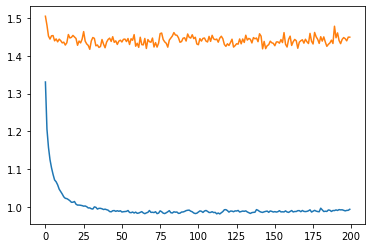

In [21]:
plt.plot(loss_train)
plt.plot(loss_test)
plt.show()

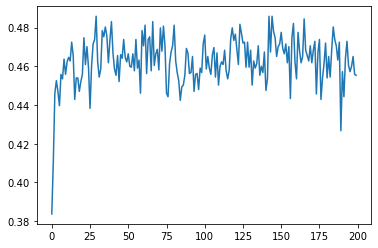

In [22]:
plt.plot(acc)
plt.show()

In [24]:
print("Best accuracy: ",np.max(acc)," Epoch: ", np.argmax(acc))

Best accuracy:  0.4858992  Epoch:  29


# Model2

Добавим к первой модели Batch Normalization

In [25]:
model2=nn.Sequential()
model2.add_module("dense1",nn.Linear(input_shape,128))
model2.add_module("bn1",nn.BatchNorm1d(128))
model2.add_module("relu1",nn.ReLU())
model2.add_module("dense2",nn.Linear(128,128))
model2.add_module("relu2",nn.ReLU())
model2.add_module("dense3", nn.Linear(128,5))
model2.add_module("softmax",nn.Softmax(dim=1))

In [26]:
loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters())

In [27]:
loss_train2=[]
loss_test2=[]
acc2=[]
for epoch in range(200):
    loss_train2.append(train(epoch + 1,model2))
    acc_,test_loss_=test(model2)
    acc2.append(acc_)
    loss_test2.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.605986
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.416975
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.357321
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.320948
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.373287
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.219731
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.261199

Test set: Average loss: 1.4856, Accuracy: 860/2163 (39.76%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.247801
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.160928
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.229351
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.229694
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.229231
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.258139
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.143245

Test set: Average loss: 1.4758, Accuracy: 902/2163 (41.70%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.120478
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.172905
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.192010
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.0

Train Epoch: 21 [6400/42820 (15%)]	Loss: 0.967979
Train Epoch: 21 [12800/42820 (30%)]	Loss: 0.956052
Train Epoch: 21 [19200/42820 (45%)]	Loss: 0.953892
Train Epoch: 21 [25600/42820 (60%)]	Loss: 0.964524
Train Epoch: 21 [32000/42820 (75%)]	Loss: 0.997582
Train Epoch: 21 [38400/42820 (90%)]	Loss: 0.938337

Test set: Average loss: 1.4009, Accuracy: 1080/2163 (49.93%)

Train Epoch: 22 [0/42820 (0%)]	Loss: 0.967175
Train Epoch: 22 [6400/42820 (15%)]	Loss: 0.945248
Train Epoch: 22 [12800/42820 (30%)]	Loss: 0.989456
Train Epoch: 22 [19200/42820 (45%)]	Loss: 0.958417
Train Epoch: 22 [25600/42820 (60%)]	Loss: 0.987480
Train Epoch: 22 [32000/42820 (75%)]	Loss: 0.978661
Train Epoch: 22 [38400/42820 (90%)]	Loss: 0.982252

Test set: Average loss: 1.3992, Accuracy: 1084/2163 (50.12%)

Train Epoch: 23 [0/42820 (0%)]	Loss: 0.965170
Train Epoch: 23 [6400/42820 (15%)]	Loss: 0.931887
Train Epoch: 23 [12800/42820 (30%)]	Loss: 0.997740
Train Epoch: 23 [19200/42820 (45%)]	Loss: 0.945783
Train Epoch: 23 [256

Train Epoch: 41 [6400/42820 (15%)]	Loss: 0.936205
Train Epoch: 41 [12800/42820 (30%)]	Loss: 0.904901
Train Epoch: 41 [19200/42820 (45%)]	Loss: 0.969007
Train Epoch: 41 [25600/42820 (60%)]	Loss: 0.982118
Train Epoch: 41 [32000/42820 (75%)]	Loss: 0.907986
Train Epoch: 41 [38400/42820 (90%)]	Loss: 0.920873

Test set: Average loss: 1.4069, Accuracy: 1067/2163 (49.33%)

Train Epoch: 42 [0/42820 (0%)]	Loss: 0.951564
Train Epoch: 42 [6400/42820 (15%)]	Loss: 0.953961
Train Epoch: 42 [12800/42820 (30%)]	Loss: 0.951573
Train Epoch: 42 [19200/42820 (45%)]	Loss: 0.937303
Train Epoch: 42 [25600/42820 (60%)]	Loss: 0.983391
Train Epoch: 42 [32000/42820 (75%)]	Loss: 0.936087
Train Epoch: 42 [38400/42820 (90%)]	Loss: 0.967335

Test set: Average loss: 1.4122, Accuracy: 1055/2163 (48.77%)

Train Epoch: 43 [0/42820 (0%)]	Loss: 0.920457
Train Epoch: 43 [6400/42820 (15%)]	Loss: 0.935222
Train Epoch: 43 [12800/42820 (30%)]	Loss: 0.909341
Train Epoch: 43 [19200/42820 (45%)]	Loss: 0.974248
Train Epoch: 43 [256

Train Epoch: 61 [6400/42820 (15%)]	Loss: 0.981515
Train Epoch: 61 [12800/42820 (30%)]	Loss: 0.936096
Train Epoch: 61 [19200/42820 (45%)]	Loss: 1.106731
Train Epoch: 61 [25600/42820 (60%)]	Loss: 0.920459
Train Epoch: 61 [32000/42820 (75%)]	Loss: 0.931358
Train Epoch: 61 [38400/42820 (90%)]	Loss: 0.905238

Test set: Average loss: 1.4170, Accuracy: 1044/2163 (48.27%)

Train Epoch: 62 [0/42820 (0%)]	Loss: 0.920835
Train Epoch: 62 [6400/42820 (15%)]	Loss: 0.906347
Train Epoch: 62 [12800/42820 (30%)]	Loss: 0.936186
Train Epoch: 62 [19200/42820 (45%)]	Loss: 0.912449
Train Epoch: 62 [25600/42820 (60%)]	Loss: 0.920458
Train Epoch: 62 [32000/42820 (75%)]	Loss: 0.955287
Train Epoch: 62 [38400/42820 (90%)]	Loss: 0.920593

Test set: Average loss: 1.4086, Accuracy: 1065/2163 (49.24%)

Train Epoch: 63 [0/42820 (0%)]	Loss: 0.936083
Train Epoch: 63 [6400/42820 (15%)]	Loss: 0.974352
Train Epoch: 63 [12800/42820 (30%)]	Loss: 0.920473
Train Epoch: 63 [19200/42820 (45%)]	Loss: 0.912282
Train Epoch: 63 [256

Train Epoch: 81 [6400/42820 (15%)]	Loss: 0.904842
Train Epoch: 81 [12800/42820 (30%)]	Loss: 0.936255
Train Epoch: 81 [19200/42820 (45%)]	Loss: 0.924336
Train Epoch: 81 [25600/42820 (60%)]	Loss: 0.967217
Train Epoch: 81 [32000/42820 (75%)]	Loss: 0.951734
Train Epoch: 81 [38400/42820 (90%)]	Loss: 0.951708

Test set: Average loss: 1.4170, Accuracy: 1044/2163 (48.27%)

Train Epoch: 82 [0/42820 (0%)]	Loss: 0.920528
Train Epoch: 82 [6400/42820 (15%)]	Loss: 0.936085
Train Epoch: 82 [12800/42820 (30%)]	Loss: 0.904850
Train Epoch: 82 [19200/42820 (45%)]	Loss: 0.905305
Train Epoch: 82 [25600/42820 (60%)]	Loss: 0.936043
Train Epoch: 82 [32000/42820 (75%)]	Loss: 0.973351
Train Epoch: 82 [38400/42820 (90%)]	Loss: 0.920508

Test set: Average loss: 1.3947, Accuracy: 1096/2163 (50.67%)

Train Epoch: 83 [0/42820 (0%)]	Loss: 0.923025
Train Epoch: 83 [6400/42820 (15%)]	Loss: 0.952867
Train Epoch: 83 [12800/42820 (30%)]	Loss: 0.920462
Train Epoch: 83 [19200/42820 (45%)]	Loss: 0.929412
Train Epoch: 83 [256

Train Epoch: 101 [6400/42820 (15%)]	Loss: 0.962150
Train Epoch: 101 [12800/42820 (30%)]	Loss: 0.936390
Train Epoch: 101 [19200/42820 (45%)]	Loss: 0.929258
Train Epoch: 101 [25600/42820 (60%)]	Loss: 0.920476
Train Epoch: 101 [32000/42820 (75%)]	Loss: 0.936839
Train Epoch: 101 [38400/42820 (90%)]	Loss: 0.920449

Test set: Average loss: 1.4068, Accuracy: 1068/2163 (49.38%)

Train Epoch: 102 [0/42820 (0%)]	Loss: 0.920484
Train Epoch: 102 [6400/42820 (15%)]	Loss: 0.906286
Train Epoch: 102 [12800/42820 (30%)]	Loss: 0.967099
Train Epoch: 102 [19200/42820 (45%)]	Loss: 0.904833
Train Epoch: 102 [25600/42820 (60%)]	Loss: 0.952318
Train Epoch: 102 [32000/42820 (75%)]	Loss: 0.904833
Train Epoch: 102 [38400/42820 (90%)]	Loss: 0.920458

Test set: Average loss: 1.4069, Accuracy: 1070/2163 (49.47%)

Train Epoch: 103 [0/42820 (0%)]	Loss: 0.913180
Train Epoch: 103 [6400/42820 (15%)]	Loss: 0.915429
Train Epoch: 103 [12800/42820 (30%)]	Loss: 0.959116
Train Epoch: 103 [19200/42820 (45%)]	Loss: 0.966632
Tra

Train Epoch: 120 [32000/42820 (75%)]	Loss: 0.931854
Train Epoch: 120 [38400/42820 (90%)]	Loss: 0.904839

Test set: Average loss: 1.3985, Accuracy: 1086/2163 (50.21%)

Train Epoch: 121 [0/42820 (0%)]	Loss: 0.937871
Train Epoch: 121 [6400/42820 (15%)]	Loss: 0.920458
Train Epoch: 121 [12800/42820 (30%)]	Loss: 0.967150
Train Epoch: 121 [19200/42820 (45%)]	Loss: 0.919880
Train Epoch: 121 [25600/42820 (60%)]	Loss: 0.956588
Train Epoch: 121 [32000/42820 (75%)]	Loss: 0.920458
Train Epoch: 121 [38400/42820 (90%)]	Loss: 0.920480

Test set: Average loss: 1.4029, Accuracy: 1079/2163 (49.88%)

Train Epoch: 122 [0/42820 (0%)]	Loss: 0.947319
Train Epoch: 122 [6400/42820 (15%)]	Loss: 0.920748
Train Epoch: 122 [12800/42820 (30%)]	Loss: 0.904839
Train Epoch: 122 [19200/42820 (45%)]	Loss: 0.920458
Train Epoch: 122 [25600/42820 (60%)]	Loss: 0.905364
Train Epoch: 122 [32000/42820 (75%)]	Loss: 0.904839
Train Epoch: 122 [38400/42820 (90%)]	Loss: 0.936075

Test set: Average loss: 1.4076, Accuracy: 1067/2163 (

Train Epoch: 140 [6400/42820 (15%)]	Loss: 0.904833
Train Epoch: 140 [12800/42820 (30%)]	Loss: 0.936083
Train Epoch: 140 [19200/42820 (45%)]	Loss: 0.904833
Train Epoch: 140 [25600/42820 (60%)]	Loss: 0.935160
Train Epoch: 140 [32000/42820 (75%)]	Loss: 0.920458
Train Epoch: 140 [38400/42820 (90%)]	Loss: 0.936101

Test set: Average loss: 1.3929, Accuracy: 1104/2163 (51.04%)

Train Epoch: 141 [0/42820 (0%)]	Loss: 0.920458
Train Epoch: 141 [6400/42820 (15%)]	Loss: 0.982886
Train Epoch: 141 [12800/42820 (30%)]	Loss: 0.984234
Train Epoch: 141 [19200/42820 (45%)]	Loss: 0.920514
Train Epoch: 141 [25600/42820 (60%)]	Loss: 0.905180
Train Epoch: 141 [32000/42820 (75%)]	Loss: 0.920458
Train Epoch: 141 [38400/42820 (90%)]	Loss: 0.920456

Test set: Average loss: 1.3956, Accuracy: 1095/2163 (50.62%)

Train Epoch: 142 [0/42820 (0%)]	Loss: 0.904833
Train Epoch: 142 [6400/42820 (15%)]	Loss: 0.936083
Train Epoch: 142 [12800/42820 (30%)]	Loss: 0.920959
Train Epoch: 142 [19200/42820 (45%)]	Loss: 0.920641
Tra

Train Epoch: 159 [32000/42820 (75%)]	Loss: 0.920458
Train Epoch: 159 [38400/42820 (90%)]	Loss: 0.970518

Test set: Average loss: 1.4054, Accuracy: 1079/2163 (49.88%)

Train Epoch: 160 [0/42820 (0%)]	Loss: 0.951708
Train Epoch: 160 [6400/42820 (15%)]	Loss: 0.920458
Train Epoch: 160 [12800/42820 (30%)]	Loss: 0.969350
Train Epoch: 160 [19200/42820 (45%)]	Loss: 0.904833
Train Epoch: 160 [25600/42820 (60%)]	Loss: 0.920458
Train Epoch: 160 [32000/42820 (75%)]	Loss: 0.904833
Train Epoch: 160 [38400/42820 (90%)]	Loss: 0.923882

Test set: Average loss: 1.4042, Accuracy: 1078/2163 (49.84%)

Train Epoch: 161 [0/42820 (0%)]	Loss: 0.919609
Train Epoch: 161 [6400/42820 (15%)]	Loss: 0.936083
Train Epoch: 161 [12800/42820 (30%)]	Loss: 0.920029
Train Epoch: 161 [19200/42820 (45%)]	Loss: 0.951708
Train Epoch: 161 [25600/42820 (60%)]	Loss: 0.920458
Train Epoch: 161 [32000/42820 (75%)]	Loss: 0.943922
Train Epoch: 161 [38400/42820 (90%)]	Loss: 0.932949

Test set: Average loss: 1.3965, Accuracy: 1095/2163 (

Train Epoch: 179 [6400/42820 (15%)]	Loss: 0.936083
Train Epoch: 179 [12800/42820 (30%)]	Loss: 0.920458
Train Epoch: 179 [19200/42820 (45%)]	Loss: 0.910503
Train Epoch: 179 [25600/42820 (60%)]	Loss: 0.936082
Train Epoch: 179 [32000/42820 (75%)]	Loss: 0.935996
Train Epoch: 179 [38400/42820 (90%)]	Loss: 0.951707

Test set: Average loss: 1.4033, Accuracy: 1081/2163 (49.98%)

Train Epoch: 180 [0/42820 (0%)]	Loss: 0.904833
Train Epoch: 180 [6400/42820 (15%)]	Loss: 0.920458
Train Epoch: 180 [12800/42820 (30%)]	Loss: 0.951934
Train Epoch: 180 [19200/42820 (45%)]	Loss: 0.904833
Train Epoch: 180 [25600/42820 (60%)]	Loss: 0.920478
Train Epoch: 180 [32000/42820 (75%)]	Loss: 0.904840
Train Epoch: 180 [38400/42820 (90%)]	Loss: 0.938787

Test set: Average loss: 1.4162, Accuracy: 1051/2163 (48.59%)

Train Epoch: 181 [0/42820 (0%)]	Loss: 0.904897
Train Epoch: 181 [6400/42820 (15%)]	Loss: 0.920456
Train Epoch: 181 [12800/42820 (30%)]	Loss: 0.904833
Train Epoch: 181 [19200/42820 (45%)]	Loss: 0.920472
Tra

Train Epoch: 198 [32000/42820 (75%)]	Loss: 0.920458
Train Epoch: 198 [38400/42820 (90%)]	Loss: 0.904833

Test set: Average loss: 1.4160, Accuracy: 1053/2163 (48.68%)

Train Epoch: 199 [0/42820 (0%)]	Loss: 0.920458
Train Epoch: 199 [6400/42820 (15%)]	Loss: 0.905304
Train Epoch: 199 [12800/42820 (30%)]	Loss: 0.920459
Train Epoch: 199 [19200/42820 (45%)]	Loss: 0.904833
Train Epoch: 199 [25600/42820 (60%)]	Loss: 0.904833
Train Epoch: 199 [32000/42820 (75%)]	Loss: 0.916493
Train Epoch: 199 [38400/42820 (90%)]	Loss: 0.936083

Test set: Average loss: 1.3955, Accuracy: 1099/2163 (50.81%)

Train Epoch: 200 [0/42820 (0%)]	Loss: 0.920458
Train Epoch: 200 [6400/42820 (15%)]	Loss: 0.920375
Train Epoch: 200 [12800/42820 (30%)]	Loss: 0.920458
Train Epoch: 200 [19200/42820 (45%)]	Loss: 0.920458
Train Epoch: 200 [25600/42820 (60%)]	Loss: 0.920447
Train Epoch: 200 [32000/42820 (75%)]	Loss: 0.936083
Train Epoch: 200 [38400/42820 (90%)]	Loss: 0.936083

Test set: Average loss: 1.4044, Accuracy: 1077/2163 (

In [34]:
print_confusion_matrix(model2, X_test, y_test)

[[724  93 107  26  14]
 [166 114  96  32   1]
 [172  97 206  31  13]
 [ 88  47  44  32   4]
 [ 41   6   6   2   1]]
Accuracy = 0.49791955617198336


0.49791955617198336

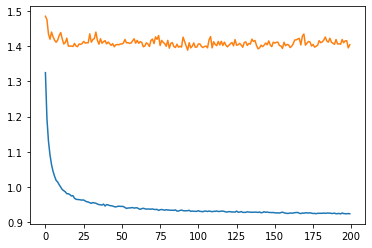

In [28]:
plt.plot(loss_train2)
plt.plot(loss_test2)
plt.show()

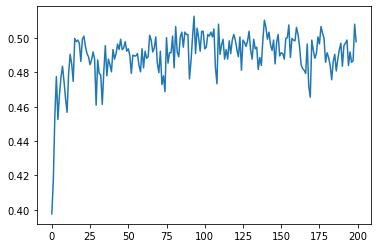

In [29]:
plt.plot(acc2)
plt.show()

In [30]:
print("Best accuracy: ",np.max(acc2)," Epoch: ", np.argmax(acc2))

Best accuracy:  0.51271385  Epoch:  93


При добавлении Batch Normalization результат обучения стал лучше.
График потерь на тестовой выборке стал менее "шумным".

# Model3

Добавим ко второй подели Dropout=0.5

In [31]:
model3=nn.Sequential()
model3.add_module("dense1",nn.Linear(input_shape,128))
model3.add_module("bn1",nn.BatchNorm1d(128))
model3.add_module("drop1", nn.Dropout(0.5))
model3.add_module("relu1",nn.ReLU())
model3.add_module("dense2",nn.Linear(128,128))
model3.add_module("relu2",nn.ReLU())
model3.add_module("dense3", nn.Linear(128,5))
model3.add_module("softmax",nn.Softmax(dim=1))

In [32]:
loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters())

In [33]:
loss_train3=[]
loss_test3=[]
acc3=[]
for epoch in range(200):
    loss_train3.append(train(epoch + 1,model3))
    acc_,test_loss_=test(model3)
    acc3.append(acc_)
    loss_test3.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.611503
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.419826
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.287499
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.330386
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.363689
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.311525
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.190391

Test set: Average loss: 1.5075, Accuracy: 823/2163 (38.05%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.182504
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.213643
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.294862
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.370353
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.240196
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.244915
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.224801

Test set: Average loss: 1.4975, Accuracy: 852/2163 (39.39%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.162424
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.220635
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.202559
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.3

Train Epoch: 21 [6400/42820 (15%)]	Loss: 1.070603
Train Epoch: 21 [12800/42820 (30%)]	Loss: 1.163649
Train Epoch: 21 [19200/42820 (45%)]	Loss: 1.154590
Train Epoch: 21 [25600/42820 (60%)]	Loss: 1.090959
Train Epoch: 21 [32000/42820 (75%)]	Loss: 1.016854
Train Epoch: 21 [38400/42820 (90%)]	Loss: 1.091239

Test set: Average loss: 1.3982, Accuracy: 1074/2163 (49.65%)

Train Epoch: 22 [0/42820 (0%)]	Loss: 1.023367
Train Epoch: 22 [6400/42820 (15%)]	Loss: 1.065535
Train Epoch: 22 [12800/42820 (30%)]	Loss: 1.107546
Train Epoch: 22 [19200/42820 (45%)]	Loss: 1.002295
Train Epoch: 22 [25600/42820 (60%)]	Loss: 1.094360
Train Epoch: 22 [32000/42820 (75%)]	Loss: 1.054494
Train Epoch: 22 [38400/42820 (90%)]	Loss: 1.066867

Test set: Average loss: 1.4017, Accuracy: 1075/2163 (49.70%)

Train Epoch: 23 [0/42820 (0%)]	Loss: 1.015157
Train Epoch: 23 [6400/42820 (15%)]	Loss: 1.055675
Train Epoch: 23 [12800/42820 (30%)]	Loss: 1.007220
Train Epoch: 23 [19200/42820 (45%)]	Loss: 1.178692
Train Epoch: 23 [256

Train Epoch: 41 [6400/42820 (15%)]	Loss: 1.059908
Train Epoch: 41 [12800/42820 (30%)]	Loss: 0.985549
Train Epoch: 41 [19200/42820 (45%)]	Loss: 1.010127
Train Epoch: 41 [25600/42820 (60%)]	Loss: 1.090777
Train Epoch: 41 [32000/42820 (75%)]	Loss: 1.044075
Train Epoch: 41 [38400/42820 (90%)]	Loss: 1.020351

Test set: Average loss: 1.3981, Accuracy: 1086/2163 (50.21%)

Train Epoch: 42 [0/42820 (0%)]	Loss: 1.018357
Train Epoch: 42 [6400/42820 (15%)]	Loss: 1.117775
Train Epoch: 42 [12800/42820 (30%)]	Loss: 1.020685
Train Epoch: 42 [19200/42820 (45%)]	Loss: 1.016604
Train Epoch: 42 [25600/42820 (60%)]	Loss: 1.068308
Train Epoch: 42 [32000/42820 (75%)]	Loss: 1.085996
Train Epoch: 42 [38400/42820 (90%)]	Loss: 1.011871

Test set: Average loss: 1.3922, Accuracy: 1097/2163 (50.72%)

Train Epoch: 43 [0/42820 (0%)]	Loss: 1.013517
Train Epoch: 43 [6400/42820 (15%)]	Loss: 1.089456
Train Epoch: 43 [12800/42820 (30%)]	Loss: 1.001665
Train Epoch: 43 [19200/42820 (45%)]	Loss: 1.099478
Train Epoch: 43 [256

Train Epoch: 61 [6400/42820 (15%)]	Loss: 1.048347
Train Epoch: 61 [12800/42820 (30%)]	Loss: 1.002226
Train Epoch: 61 [19200/42820 (45%)]	Loss: 1.086176
Train Epoch: 61 [25600/42820 (60%)]	Loss: 0.980576
Train Epoch: 61 [32000/42820 (75%)]	Loss: 0.989606
Train Epoch: 61 [38400/42820 (90%)]	Loss: 1.057274

Test set: Average loss: 1.3947, Accuracy: 1099/2163 (50.81%)

Train Epoch: 62 [0/42820 (0%)]	Loss: 1.041571
Train Epoch: 62 [6400/42820 (15%)]	Loss: 1.034663
Train Epoch: 62 [12800/42820 (30%)]	Loss: 1.060803
Train Epoch: 62 [19200/42820 (45%)]	Loss: 0.990650
Train Epoch: 62 [25600/42820 (60%)]	Loss: 1.062016
Train Epoch: 62 [32000/42820 (75%)]	Loss: 1.083090
Train Epoch: 62 [38400/42820 (90%)]	Loss: 1.022010

Test set: Average loss: 1.3881, Accuracy: 1109/2163 (51.27%)

Train Epoch: 63 [0/42820 (0%)]	Loss: 0.981695
Train Epoch: 63 [6400/42820 (15%)]	Loss: 1.029071
Train Epoch: 63 [12800/42820 (30%)]	Loss: 0.985950
Train Epoch: 63 [19200/42820 (45%)]	Loss: 1.007872
Train Epoch: 63 [256

Train Epoch: 81 [6400/42820 (15%)]	Loss: 1.022343
Train Epoch: 81 [12800/42820 (30%)]	Loss: 1.047826
Train Epoch: 81 [19200/42820 (45%)]	Loss: 0.952889
Train Epoch: 81 [25600/42820 (60%)]	Loss: 1.031628
Train Epoch: 81 [32000/42820 (75%)]	Loss: 1.012570
Train Epoch: 81 [38400/42820 (90%)]	Loss: 1.042616

Test set: Average loss: 1.3850, Accuracy: 1114/2163 (51.50%)

Train Epoch: 82 [0/42820 (0%)]	Loss: 0.982650
Train Epoch: 82 [6400/42820 (15%)]	Loss: 1.060585
Train Epoch: 82 [12800/42820 (30%)]	Loss: 0.997537
Train Epoch: 82 [19200/42820 (45%)]	Loss: 0.984072
Train Epoch: 82 [25600/42820 (60%)]	Loss: 0.985566
Train Epoch: 82 [32000/42820 (75%)]	Loss: 1.078690
Train Epoch: 82 [38400/42820 (90%)]	Loss: 1.087340

Test set: Average loss: 1.3820, Accuracy: 1122/2163 (51.87%)

Train Epoch: 83 [0/42820 (0%)]	Loss: 1.055507
Train Epoch: 83 [6400/42820 (15%)]	Loss: 0.966663
Train Epoch: 83 [12800/42820 (30%)]	Loss: 0.967725
Train Epoch: 83 [19200/42820 (45%)]	Loss: 0.984932
Train Epoch: 83 [256

Train Epoch: 101 [6400/42820 (15%)]	Loss: 1.041020
Train Epoch: 101 [12800/42820 (30%)]	Loss: 1.000035
Train Epoch: 101 [19200/42820 (45%)]	Loss: 0.995454
Train Epoch: 101 [25600/42820 (60%)]	Loss: 1.089103
Train Epoch: 101 [32000/42820 (75%)]	Loss: 0.973710
Train Epoch: 101 [38400/42820 (90%)]	Loss: 0.968201

Test set: Average loss: 1.3798, Accuracy: 1125/2163 (52.01%)

Train Epoch: 102 [0/42820 (0%)]	Loss: 1.000655
Train Epoch: 102 [6400/42820 (15%)]	Loss: 0.995478
Train Epoch: 102 [12800/42820 (30%)]	Loss: 1.006708
Train Epoch: 102 [19200/42820 (45%)]	Loss: 1.043648
Train Epoch: 102 [25600/42820 (60%)]	Loss: 1.000404
Train Epoch: 102 [32000/42820 (75%)]	Loss: 0.943415
Train Epoch: 102 [38400/42820 (90%)]	Loss: 1.045189

Test set: Average loss: 1.3930, Accuracy: 1093/2163 (50.53%)

Train Epoch: 103 [0/42820 (0%)]	Loss: 1.061221
Train Epoch: 103 [6400/42820 (15%)]	Loss: 1.040264
Train Epoch: 103 [12800/42820 (30%)]	Loss: 1.072338
Train Epoch: 103 [19200/42820 (45%)]	Loss: 0.996547
Tra

Train Epoch: 120 [32000/42820 (75%)]	Loss: 0.992556
Train Epoch: 120 [38400/42820 (90%)]	Loss: 0.967575

Test set: Average loss: 1.3994, Accuracy: 1083/2163 (50.07%)

Train Epoch: 121 [0/42820 (0%)]	Loss: 1.001943
Train Epoch: 121 [6400/42820 (15%)]	Loss: 1.029828
Train Epoch: 121 [12800/42820 (30%)]	Loss: 1.025470
Train Epoch: 121 [19200/42820 (45%)]	Loss: 1.004453
Train Epoch: 121 [25600/42820 (60%)]	Loss: 0.977652
Train Epoch: 121 [32000/42820 (75%)]	Loss: 1.033799
Train Epoch: 121 [38400/42820 (90%)]	Loss: 0.984547

Test set: Average loss: 1.3925, Accuracy: 1099/2163 (50.81%)

Train Epoch: 122 [0/42820 (0%)]	Loss: 0.979241
Train Epoch: 122 [6400/42820 (15%)]	Loss: 1.003052
Train Epoch: 122 [12800/42820 (30%)]	Loss: 0.987513
Train Epoch: 122 [19200/42820 (45%)]	Loss: 1.010742
Train Epoch: 122 [25600/42820 (60%)]	Loss: 0.949448
Train Epoch: 122 [32000/42820 (75%)]	Loss: 0.982003
Train Epoch: 122 [38400/42820 (90%)]	Loss: 1.005463

Test set: Average loss: 1.4310, Accuracy: 1008/2163 (

Train Epoch: 140 [6400/42820 (15%)]	Loss: 1.016715
Train Epoch: 140 [12800/42820 (30%)]	Loss: 0.937704
Train Epoch: 140 [19200/42820 (45%)]	Loss: 0.951589
Train Epoch: 140 [25600/42820 (60%)]	Loss: 0.983224
Train Epoch: 140 [32000/42820 (75%)]	Loss: 1.004420
Train Epoch: 140 [38400/42820 (90%)]	Loss: 0.922771

Test set: Average loss: 1.3870, Accuracy: 1106/2163 (51.13%)

Train Epoch: 141 [0/42820 (0%)]	Loss: 0.951737
Train Epoch: 141 [6400/42820 (15%)]	Loss: 1.018189
Train Epoch: 141 [12800/42820 (30%)]	Loss: 0.974540
Train Epoch: 141 [19200/42820 (45%)]	Loss: 0.991012
Train Epoch: 141 [25600/42820 (60%)]	Loss: 0.980482
Train Epoch: 141 [32000/42820 (75%)]	Loss: 0.995884
Train Epoch: 141 [38400/42820 (90%)]	Loss: 1.010004

Test set: Average loss: 1.3871, Accuracy: 1115/2163 (51.55%)

Train Epoch: 142 [0/42820 (0%)]	Loss: 1.025470
Train Epoch: 142 [6400/42820 (15%)]	Loss: 1.045165
Train Epoch: 142 [12800/42820 (30%)]	Loss: 0.989980
Train Epoch: 142 [19200/42820 (45%)]	Loss: 0.983170
Tra

Train Epoch: 159 [32000/42820 (75%)]	Loss: 0.920469
Train Epoch: 159 [38400/42820 (90%)]	Loss: 1.030777

Test set: Average loss: 1.3847, Accuracy: 1123/2163 (51.92%)

Train Epoch: 160 [0/42820 (0%)]	Loss: 1.018330
Train Epoch: 160 [6400/42820 (15%)]	Loss: 0.965676
Train Epoch: 160 [12800/42820 (30%)]	Loss: 0.981782
Train Epoch: 160 [19200/42820 (45%)]	Loss: 0.957129
Train Epoch: 160 [25600/42820 (60%)]	Loss: 1.050556
Train Epoch: 160 [32000/42820 (75%)]	Loss: 0.997637
Train Epoch: 160 [38400/42820 (90%)]	Loss: 0.942886

Test set: Average loss: 1.3856, Accuracy: 1113/2163 (51.46%)

Train Epoch: 161 [0/42820 (0%)]	Loss: 0.997790
Train Epoch: 161 [6400/42820 (15%)]	Loss: 0.967880
Train Epoch: 161 [12800/42820 (30%)]	Loss: 0.955573
Train Epoch: 161 [19200/42820 (45%)]	Loss: 1.009882
Train Epoch: 161 [25600/42820 (60%)]	Loss: 0.975486
Train Epoch: 161 [32000/42820 (75%)]	Loss: 1.067813
Train Epoch: 161 [38400/42820 (90%)]	Loss: 0.970772

Test set: Average loss: 1.4179, Accuracy: 1036/2163 (

Train Epoch: 179 [6400/42820 (15%)]	Loss: 0.965026
Train Epoch: 179 [12800/42820 (30%)]	Loss: 0.967405
Train Epoch: 179 [19200/42820 (45%)]	Loss: 0.984220
Train Epoch: 179 [25600/42820 (60%)]	Loss: 0.984333
Train Epoch: 179 [32000/42820 (75%)]	Loss: 0.951951
Train Epoch: 179 [38400/42820 (90%)]	Loss: 0.945781

Test set: Average loss: 1.3891, Accuracy: 1103/2163 (50.99%)

Train Epoch: 180 [0/42820 (0%)]	Loss: 1.027983
Train Epoch: 180 [6400/42820 (15%)]	Loss: 1.029068
Train Epoch: 180 [12800/42820 (30%)]	Loss: 0.930294
Train Epoch: 180 [19200/42820 (45%)]	Loss: 0.981693
Train Epoch: 180 [25600/42820 (60%)]	Loss: 0.985355
Train Epoch: 180 [32000/42820 (75%)]	Loss: 0.982460
Train Epoch: 180 [38400/42820 (90%)]	Loss: 0.936025

Test set: Average loss: 1.3836, Accuracy: 1120/2163 (51.78%)

Train Epoch: 181 [0/42820 (0%)]	Loss: 0.984161
Train Epoch: 181 [6400/42820 (15%)]	Loss: 0.930476
Train Epoch: 181 [12800/42820 (30%)]	Loss: 0.950746
Train Epoch: 181 [19200/42820 (45%)]	Loss: 0.982730
Tra

Train Epoch: 198 [32000/42820 (75%)]	Loss: 0.967711
Train Epoch: 198 [38400/42820 (90%)]	Loss: 0.960577

Test set: Average loss: 1.3957, Accuracy: 1093/2163 (50.53%)

Train Epoch: 199 [0/42820 (0%)]	Loss: 0.988721
Train Epoch: 199 [6400/42820 (15%)]	Loss: 0.987226
Train Epoch: 199 [12800/42820 (30%)]	Loss: 0.922632
Train Epoch: 199 [19200/42820 (45%)]	Loss: 0.976346
Train Epoch: 199 [25600/42820 (60%)]	Loss: 1.021290
Train Epoch: 199 [32000/42820 (75%)]	Loss: 1.000816
Train Epoch: 199 [38400/42820 (90%)]	Loss: 0.957136

Test set: Average loss: 1.3885, Accuracy: 1103/2163 (50.99%)

Train Epoch: 200 [0/42820 (0%)]	Loss: 0.982200
Train Epoch: 200 [6400/42820 (15%)]	Loss: 1.042688
Train Epoch: 200 [12800/42820 (30%)]	Loss: 0.928793
Train Epoch: 200 [19200/42820 (45%)]	Loss: 1.022120
Train Epoch: 200 [25600/42820 (60%)]	Loss: 0.904837
Train Epoch: 200 [32000/42820 (75%)]	Loss: 1.028871
Train Epoch: 200 [38400/42820 (90%)]	Loss: 0.959231

Test set: Average loss: 1.3837, Accuracy: 1120/2163 (

In [35]:
print_confusion_matrix(model3, X_test, y_test)

[[803  57  88  14   2]
 [182  88 108  30   1]
 [215  71 197  28   8]
 [ 98  38  47  32   0]
 [ 43   4   8   1   0]]
Accuracy = 0.517799352750809


0.517799352750809

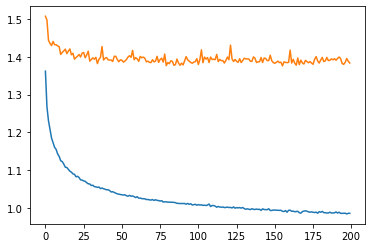

In [36]:
plt.plot(loss_train3)
plt.plot(loss_test3)
plt.show()

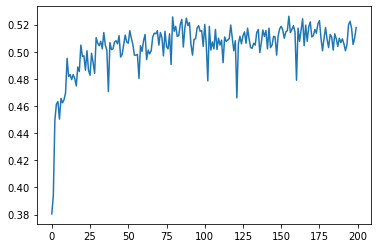

In [37]:
plt.plot(acc3)
plt.show()

In [38]:
print("Best accuracy: ",np.max(acc3)," Epoch: ", np.argmax(acc3))

Best accuracy:  0.52612114  Epoch:  155


Результат обучения стал ещё лучше

# Model4

Добавим к третьей модели ещё один Dropout=0.5

In [39]:
model4=nn.Sequential()
model4.add_module("dense1",nn.Linear(input_shape,128))
model4.add_module("bn1",nn.BatchNorm1d(128))
model4.add_module("drop1", nn.Dropout(0.5))
model4.add_module("relu1",nn.ReLU())
model4.add_module("dense2",nn.Linear(128,128))
model4.add_module("drop2", nn.Dropout(0.5))
model4.add_module("relu2",nn.ReLU())
model4.add_module("dense3", nn.Linear(128,5))
model4.add_module("softmax",nn.Softmax(dim=1))

In [40]:
loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters())

In [41]:
loss_train4=[]
loss_test4=[]
acc4=[]
for epoch in range(200):
    loss_train4.append(train(epoch + 1,model4))
    acc_,test_loss_=test(model4)
    acc4.append(acc_)
    loss_test4.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.609064
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.444388
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.336307
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.338705
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.396895
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.360763
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.253364

Test set: Average loss: 1.5058, Accuracy: 837/2163 (38.70%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.310520
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.339760
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.306925
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.354642
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.303889
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.259556
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.305269

Test set: Average loss: 1.5007, Accuracy: 844/2163 (39.02%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.230870
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.307682
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.197751
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.2

Train Epoch: 21 [6400/42820 (15%)]	Loss: 1.084430
Train Epoch: 21 [12800/42820 (30%)]	Loss: 1.108074
Train Epoch: 21 [19200/42820 (45%)]	Loss: 1.080312
Train Epoch: 21 [25600/42820 (60%)]	Loss: 1.113336
Train Epoch: 21 [32000/42820 (75%)]	Loss: 1.108482
Train Epoch: 21 [38400/42820 (90%)]	Loss: 1.206842

Test set: Average loss: 1.4083, Accuracy: 1057/2163 (48.87%)

Train Epoch: 22 [0/42820 (0%)]	Loss: 1.056913
Train Epoch: 22 [6400/42820 (15%)]	Loss: 1.125903
Train Epoch: 22 [12800/42820 (30%)]	Loss: 1.052591
Train Epoch: 22 [19200/42820 (45%)]	Loss: 1.108313
Train Epoch: 22 [25600/42820 (60%)]	Loss: 1.125174
Train Epoch: 22 [32000/42820 (75%)]	Loss: 1.057840
Train Epoch: 22 [38400/42820 (90%)]	Loss: 1.074177

Test set: Average loss: 1.4083, Accuracy: 1053/2163 (48.68%)

Train Epoch: 23 [0/42820 (0%)]	Loss: 1.057219
Train Epoch: 23 [6400/42820 (15%)]	Loss: 1.032286
Train Epoch: 23 [12800/42820 (30%)]	Loss: 1.057904
Train Epoch: 23 [19200/42820 (45%)]	Loss: 1.133186
Train Epoch: 23 [256

Train Epoch: 41 [6400/42820 (15%)]	Loss: 1.047320
Train Epoch: 41 [12800/42820 (30%)]	Loss: 0.987956
Train Epoch: 41 [19200/42820 (45%)]	Loss: 1.098826
Train Epoch: 41 [25600/42820 (60%)]	Loss: 1.063749
Train Epoch: 41 [32000/42820 (75%)]	Loss: 1.095277
Train Epoch: 41 [38400/42820 (90%)]	Loss: 1.095295

Test set: Average loss: 1.4052, Accuracy: 1064/2163 (49.19%)

Train Epoch: 42 [0/42820 (0%)]	Loss: 1.033180
Train Epoch: 42 [6400/42820 (15%)]	Loss: 1.022642
Train Epoch: 42 [12800/42820 (30%)]	Loss: 1.062464
Train Epoch: 42 [19200/42820 (45%)]	Loss: 0.997778
Train Epoch: 42 [25600/42820 (60%)]	Loss: 1.025231
Train Epoch: 42 [32000/42820 (75%)]	Loss: 1.049697
Train Epoch: 42 [38400/42820 (90%)]	Loss: 1.154454

Test set: Average loss: 1.4023, Accuracy: 1070/2163 (49.47%)

Train Epoch: 43 [0/42820 (0%)]	Loss: 1.084222
Train Epoch: 43 [6400/42820 (15%)]	Loss: 0.988722
Train Epoch: 43 [12800/42820 (30%)]	Loss: 1.055805
Train Epoch: 43 [19200/42820 (45%)]	Loss: 1.084456
Train Epoch: 43 [256

Train Epoch: 61 [6400/42820 (15%)]	Loss: 0.953261
Train Epoch: 61 [12800/42820 (30%)]	Loss: 1.025592
Train Epoch: 61 [19200/42820 (45%)]	Loss: 0.997628
Train Epoch: 61 [25600/42820 (60%)]	Loss: 1.114929
Train Epoch: 61 [32000/42820 (75%)]	Loss: 1.026153
Train Epoch: 61 [38400/42820 (90%)]	Loss: 1.048732

Test set: Average loss: 1.3902, Accuracy: 1096/2163 (50.67%)

Train Epoch: 62 [0/42820 (0%)]	Loss: 0.953426
Train Epoch: 62 [6400/42820 (15%)]	Loss: 1.047109
Train Epoch: 62 [12800/42820 (30%)]	Loss: 0.991587
Train Epoch: 62 [19200/42820 (45%)]	Loss: 1.072808
Train Epoch: 62 [25600/42820 (60%)]	Loss: 0.974047
Train Epoch: 62 [32000/42820 (75%)]	Loss: 1.033933
Train Epoch: 62 [38400/42820 (90%)]	Loss: 0.968903

Test set: Average loss: 1.3945, Accuracy: 1093/2163 (50.53%)

Train Epoch: 63 [0/42820 (0%)]	Loss: 1.052735
Train Epoch: 63 [6400/42820 (15%)]	Loss: 1.066164
Train Epoch: 63 [12800/42820 (30%)]	Loss: 1.073953
Train Epoch: 63 [19200/42820 (45%)]	Loss: 1.039217
Train Epoch: 63 [256

Train Epoch: 81 [6400/42820 (15%)]	Loss: 0.957596
Train Epoch: 81 [12800/42820 (30%)]	Loss: 0.999994
Train Epoch: 81 [19200/42820 (45%)]	Loss: 1.052057
Train Epoch: 81 [25600/42820 (60%)]	Loss: 0.917085
Train Epoch: 81 [32000/42820 (75%)]	Loss: 1.027601
Train Epoch: 81 [38400/42820 (90%)]	Loss: 0.977344

Test set: Average loss: 1.3896, Accuracy: 1103/2163 (50.99%)

Train Epoch: 82 [0/42820 (0%)]	Loss: 1.091617
Train Epoch: 82 [6400/42820 (15%)]	Loss: 1.019325
Train Epoch: 82 [12800/42820 (30%)]	Loss: 1.001720
Train Epoch: 82 [19200/42820 (45%)]	Loss: 1.026144
Train Epoch: 82 [25600/42820 (60%)]	Loss: 0.936059
Train Epoch: 82 [32000/42820 (75%)]	Loss: 1.011567
Train Epoch: 82 [38400/42820 (90%)]	Loss: 1.071049

Test set: Average loss: 1.3859, Accuracy: 1114/2163 (51.50%)

Train Epoch: 83 [0/42820 (0%)]	Loss: 1.025847
Train Epoch: 83 [6400/42820 (15%)]	Loss: 0.987355
Train Epoch: 83 [12800/42820 (30%)]	Loss: 1.010718
Train Epoch: 83 [19200/42820 (45%)]	Loss: 0.992600
Train Epoch: 83 [256

Train Epoch: 101 [6400/42820 (15%)]	Loss: 1.013706
Train Epoch: 101 [12800/42820 (30%)]	Loss: 0.997237
Train Epoch: 101 [19200/42820 (45%)]	Loss: 0.986056
Train Epoch: 101 [25600/42820 (60%)]	Loss: 1.028845
Train Epoch: 101 [32000/42820 (75%)]	Loss: 0.981467
Train Epoch: 101 [38400/42820 (90%)]	Loss: 1.022396

Test set: Average loss: 1.3982, Accuracy: 1080/2163 (49.93%)

Train Epoch: 102 [0/42820 (0%)]	Loss: 1.035125
Train Epoch: 102 [6400/42820 (15%)]	Loss: 1.012205
Train Epoch: 102 [12800/42820 (30%)]	Loss: 1.024114
Train Epoch: 102 [19200/42820 (45%)]	Loss: 0.948136
Train Epoch: 102 [25600/42820 (60%)]	Loss: 1.021362
Train Epoch: 102 [32000/42820 (75%)]	Loss: 1.013355
Train Epoch: 102 [38400/42820 (90%)]	Loss: 1.014819

Test set: Average loss: 1.3965, Accuracy: 1084/2163 (50.12%)

Train Epoch: 103 [0/42820 (0%)]	Loss: 1.042510
Train Epoch: 103 [6400/42820 (15%)]	Loss: 0.949015
Train Epoch: 103 [12800/42820 (30%)]	Loss: 1.029146
Train Epoch: 103 [19200/42820 (45%)]	Loss: 1.010604
Tra

Train Epoch: 120 [32000/42820 (75%)]	Loss: 0.948065
Train Epoch: 120 [38400/42820 (90%)]	Loss: 1.060676

Test set: Average loss: 1.3925, Accuracy: 1100/2163 (50.86%)

Train Epoch: 121 [0/42820 (0%)]	Loss: 1.010105
Train Epoch: 121 [6400/42820 (15%)]	Loss: 0.981635
Train Epoch: 121 [12800/42820 (30%)]	Loss: 0.966698
Train Epoch: 121 [19200/42820 (45%)]	Loss: 0.977893
Train Epoch: 121 [25600/42820 (60%)]	Loss: 1.061233
Train Epoch: 121 [32000/42820 (75%)]	Loss: 1.358329
Train Epoch: 121 [38400/42820 (90%)]	Loss: 0.981917

Test set: Average loss: 1.3979, Accuracy: 1087/2163 (50.25%)

Train Epoch: 122 [0/42820 (0%)]	Loss: 0.944057
Train Epoch: 122 [6400/42820 (15%)]	Loss: 1.030848
Train Epoch: 122 [12800/42820 (30%)]	Loss: 0.971938
Train Epoch: 122 [19200/42820 (45%)]	Loss: 1.013562
Train Epoch: 122 [25600/42820 (60%)]	Loss: 0.940649
Train Epoch: 122 [32000/42820 (75%)]	Loss: 0.974046
Train Epoch: 122 [38400/42820 (90%)]	Loss: 1.020403

Test set: Average loss: 1.3927, Accuracy: 1096/2163 (

Train Epoch: 140 [6400/42820 (15%)]	Loss: 1.021221
Train Epoch: 140 [12800/42820 (30%)]	Loss: 0.983952
Train Epoch: 140 [19200/42820 (45%)]	Loss: 0.965540
Train Epoch: 140 [25600/42820 (60%)]	Loss: 0.936783
Train Epoch: 140 [32000/42820 (75%)]	Loss: 0.970349
Train Epoch: 140 [38400/42820 (90%)]	Loss: 0.933812

Test set: Average loss: 1.3993, Accuracy: 1085/2163 (50.16%)

Train Epoch: 141 [0/42820 (0%)]	Loss: 0.953279
Train Epoch: 141 [6400/42820 (15%)]	Loss: 0.976265
Train Epoch: 141 [12800/42820 (30%)]	Loss: 1.046686
Train Epoch: 141 [19200/42820 (45%)]	Loss: 0.977894
Train Epoch: 141 [25600/42820 (60%)]	Loss: 0.973007
Train Epoch: 141 [32000/42820 (75%)]	Loss: 1.009941
Train Epoch: 141 [38400/42820 (90%)]	Loss: 0.957335

Test set: Average loss: 1.3887, Accuracy: 1111/2163 (51.36%)

Train Epoch: 142 [0/42820 (0%)]	Loss: 0.949671
Train Epoch: 142 [6400/42820 (15%)]	Loss: 1.016588
Train Epoch: 142 [12800/42820 (30%)]	Loss: 0.979570
Train Epoch: 142 [19200/42820 (45%)]	Loss: 0.983568
Tra

Train Epoch: 159 [32000/42820 (75%)]	Loss: 1.001392
Train Epoch: 159 [38400/42820 (90%)]	Loss: 0.984486

Test set: Average loss: 1.3884, Accuracy: 1104/2163 (51.04%)

Train Epoch: 160 [0/42820 (0%)]	Loss: 0.986272
Train Epoch: 160 [6400/42820 (15%)]	Loss: 1.045023
Train Epoch: 160 [12800/42820 (30%)]	Loss: 0.997627
Train Epoch: 160 [19200/42820 (45%)]	Loss: 0.969132
Train Epoch: 160 [25600/42820 (60%)]	Loss: 0.926213
Train Epoch: 160 [32000/42820 (75%)]	Loss: 1.000243
Train Epoch: 160 [38400/42820 (90%)]	Loss: 0.997333

Test set: Average loss: 1.3870, Accuracy: 1112/2163 (51.41%)

Train Epoch: 161 [0/42820 (0%)]	Loss: 0.932583
Train Epoch: 161 [6400/42820 (15%)]	Loss: 0.958601
Train Epoch: 161 [12800/42820 (30%)]	Loss: 1.014321
Train Epoch: 161 [19200/42820 (45%)]	Loss: 0.996731
Train Epoch: 161 [25600/42820 (60%)]	Loss: 0.952282
Train Epoch: 161 [32000/42820 (75%)]	Loss: 1.013509
Train Epoch: 161 [38400/42820 (90%)]	Loss: 0.970165

Test set: Average loss: 1.3869, Accuracy: 1112/2163 (

Train Epoch: 179 [6400/42820 (15%)]	Loss: 0.951817
Train Epoch: 179 [12800/42820 (30%)]	Loss: 1.018462
Train Epoch: 179 [19200/42820 (45%)]	Loss: 0.966391
Train Epoch: 179 [25600/42820 (60%)]	Loss: 1.003183
Train Epoch: 179 [32000/42820 (75%)]	Loss: 1.021448
Train Epoch: 179 [38400/42820 (90%)]	Loss: 1.012282

Test set: Average loss: 1.4546, Accuracy: 951/2163 (43.97%)

Train Epoch: 180 [0/42820 (0%)]	Loss: 0.981880
Train Epoch: 180 [6400/42820 (15%)]	Loss: 0.984833
Train Epoch: 180 [12800/42820 (30%)]	Loss: 0.960315
Train Epoch: 180 [19200/42820 (45%)]	Loss: 1.017141
Train Epoch: 180 [25600/42820 (60%)]	Loss: 1.016009
Train Epoch: 180 [32000/42820 (75%)]	Loss: 1.006402
Train Epoch: 180 [38400/42820 (90%)]	Loss: 0.938649

Test set: Average loss: 1.3865, Accuracy: 1106/2163 (51.13%)

Train Epoch: 181 [0/42820 (0%)]	Loss: 0.955687
Train Epoch: 181 [6400/42820 (15%)]	Loss: 1.005232
Train Epoch: 181 [12800/42820 (30%)]	Loss: 0.982569
Train Epoch: 181 [19200/42820 (45%)]	Loss: 1.008144
Trai

Train Epoch: 198 [32000/42820 (75%)]	Loss: 1.014767
Train Epoch: 198 [38400/42820 (90%)]	Loss: 1.007351

Test set: Average loss: 1.4044, Accuracy: 1070/2163 (49.47%)

Train Epoch: 199 [0/42820 (0%)]	Loss: 0.937337
Train Epoch: 199 [6400/42820 (15%)]	Loss: 0.983884
Train Epoch: 199 [12800/42820 (30%)]	Loss: 1.028044
Train Epoch: 199 [19200/42820 (45%)]	Loss: 0.966118
Train Epoch: 199 [25600/42820 (60%)]	Loss: 0.964186
Train Epoch: 199 [32000/42820 (75%)]	Loss: 0.995775
Train Epoch: 199 [38400/42820 (90%)]	Loss: 0.951117

Test set: Average loss: 1.3931, Accuracy: 1100/2163 (50.86%)

Train Epoch: 200 [0/42820 (0%)]	Loss: 0.963745
Train Epoch: 200 [6400/42820 (15%)]	Loss: 1.019732
Train Epoch: 200 [12800/42820 (30%)]	Loss: 0.998831
Train Epoch: 200 [19200/42820 (45%)]	Loss: 0.983052
Train Epoch: 200 [25600/42820 (60%)]	Loss: 0.994952
Train Epoch: 200 [32000/42820 (75%)]	Loss: 0.982885
Train Epoch: 200 [38400/42820 (90%)]	Loss: 0.967817

Test set: Average loss: 1.3852, Accuracy: 1124/2163 (

In [42]:
print_confusion_matrix(model4, X_test, y_test)

[[768  52 123  16   5]
 [174  84 121  27   3]
 [173  76 243  22   5]
 [ 91  40  55  29   0]
 [ 37   7  10   2   0]]
Accuracy = 0.5196486361534906


0.5196486361534906

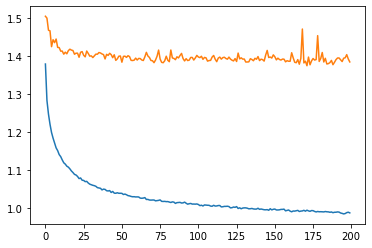

In [43]:
plt.plot(loss_train4)
plt.plot(loss_test4)
plt.show()

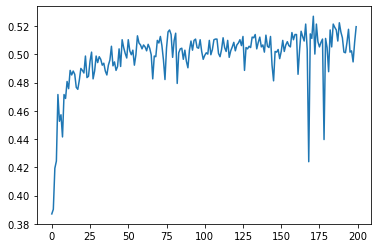

In [45]:
plt.plot(acc4)
plt.show()

In [46]:
print("Best accuracy: ",np.max(acc4)," Epoch: ", np.argmax(acc4))

Best accuracy:  0.5270458  Epoch:  171


Результат обучения почти не изменился при добавлении ещеё одного Dropout

# Model5

In [47]:
model5=nn.Sequential()
model5.add_module("dense1",nn.Linear(input_shape,128))
model5.add_module("bn1",nn.BatchNorm1d(128))
model5.add_module("drop1", nn.Dropout(0.5))
model5.add_module("relu1",nn.ReLU())
model5.add_module("dense2",nn.Linear(128,128))
model5.add_module("drop2", nn.Dropout(0.5))
model5.add_module("relu2",nn.ReLU())
model5.add_module("dense3", nn.Linear(128,5))
model5.add_module("softmax",nn.Softmax(dim=1))

In [49]:
loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model5.parameters(), lr=0.0001)

In [50]:
loss_train5=[]
loss_test5=[]
acc5=[]
for epoch in range(200):
    loss_train5.append(train(epoch + 1,model5))
    acc_,test_loss_=test(model5)
    acc5.append(acc_)
    loss_test5.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.610769
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.570534
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.498825
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.458991
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.455849
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.380566
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.363370

Test set: Average loss: 1.6106, Accuracy: 429/2163 (19.83%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.364181
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.409400
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.307841
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.338097
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.325942
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.321830
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.290951

Test set: Average loss: 1.5594, Accuracy: 638/2163 (29.50%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.203509
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.196310
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.176715
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.2

Train Epoch: 21 [6400/42820 (15%)]	Loss: 1.071673
Train Epoch: 21 [12800/42820 (30%)]	Loss: 1.168653
Train Epoch: 21 [19200/42820 (45%)]	Loss: 1.105827
Train Epoch: 21 [25600/42820 (60%)]	Loss: 1.110064
Train Epoch: 21 [32000/42820 (75%)]	Loss: 1.065986
Train Epoch: 21 [38400/42820 (90%)]	Loss: 1.087435

Test set: Average loss: 1.4061, Accuracy: 1057/2163 (48.87%)

Train Epoch: 22 [0/42820 (0%)]	Loss: 1.023955
Train Epoch: 22 [6400/42820 (15%)]	Loss: 1.097468
Train Epoch: 22 [12800/42820 (30%)]	Loss: 1.139209
Train Epoch: 22 [19200/42820 (45%)]	Loss: 1.093244
Train Epoch: 22 [25600/42820 (60%)]	Loss: 1.021045
Train Epoch: 22 [32000/42820 (75%)]	Loss: 1.020288
Train Epoch: 22 [38400/42820 (90%)]	Loss: 1.082076

Test set: Average loss: 1.4184, Accuracy: 1027/2163 (47.48%)

Train Epoch: 23 [0/42820 (0%)]	Loss: 1.017090
Train Epoch: 23 [6400/42820 (15%)]	Loss: 1.043867
Train Epoch: 23 [12800/42820 (30%)]	Loss: 1.053833
Train Epoch: 23 [19200/42820 (45%)]	Loss: 1.083209
Train Epoch: 23 [256

Train Epoch: 41 [6400/42820 (15%)]	Loss: 1.027910
Train Epoch: 41 [12800/42820 (30%)]	Loss: 1.022147
Train Epoch: 41 [19200/42820 (45%)]	Loss: 1.022681
Train Epoch: 41 [25600/42820 (60%)]	Loss: 0.976478
Train Epoch: 41 [32000/42820 (75%)]	Loss: 1.038128
Train Epoch: 41 [38400/42820 (90%)]	Loss: 1.011973

Test set: Average loss: 1.4044, Accuracy: 1061/2163 (49.05%)

Train Epoch: 42 [0/42820 (0%)]	Loss: 1.038821
Train Epoch: 42 [6400/42820 (15%)]	Loss: 1.005679
Train Epoch: 42 [12800/42820 (30%)]	Loss: 0.988463
Train Epoch: 42 [19200/42820 (45%)]	Loss: 0.985384
Train Epoch: 42 [25600/42820 (60%)]	Loss: 1.029701
Train Epoch: 42 [32000/42820 (75%)]	Loss: 1.026343
Train Epoch: 42 [38400/42820 (90%)]	Loss: 1.051054

Test set: Average loss: 1.3988, Accuracy: 1083/2163 (50.07%)

Train Epoch: 43 [0/42820 (0%)]	Loss: 1.009455
Train Epoch: 43 [6400/42820 (15%)]	Loss: 0.973213
Train Epoch: 43 [12800/42820 (30%)]	Loss: 0.987701
Train Epoch: 43 [19200/42820 (45%)]	Loss: 1.003950
Train Epoch: 43 [256

Train Epoch: 61 [6400/42820 (15%)]	Loss: 1.056268
Train Epoch: 61 [12800/42820 (30%)]	Loss: 0.978813
Train Epoch: 61 [19200/42820 (45%)]	Loss: 0.991805
Train Epoch: 61 [25600/42820 (60%)]	Loss: 1.018839
Train Epoch: 61 [32000/42820 (75%)]	Loss: 1.015914
Train Epoch: 61 [38400/42820 (90%)]	Loss: 0.980547

Test set: Average loss: 1.3966, Accuracy: 1082/2163 (50.02%)

Train Epoch: 62 [0/42820 (0%)]	Loss: 0.957926
Train Epoch: 62 [6400/42820 (15%)]	Loss: 0.955986
Train Epoch: 62 [12800/42820 (30%)]	Loss: 0.972946
Train Epoch: 62 [19200/42820 (45%)]	Loss: 0.967956
Train Epoch: 62 [25600/42820 (60%)]	Loss: 0.946605
Train Epoch: 62 [32000/42820 (75%)]	Loss: 1.006509
Train Epoch: 62 [38400/42820 (90%)]	Loss: 1.037260

Test set: Average loss: 1.3910, Accuracy: 1093/2163 (50.53%)

Train Epoch: 63 [0/42820 (0%)]	Loss: 1.013893
Train Epoch: 63 [6400/42820 (15%)]	Loss: 0.978369
Train Epoch: 63 [12800/42820 (30%)]	Loss: 1.012302
Train Epoch: 63 [19200/42820 (45%)]	Loss: 1.002209
Train Epoch: 63 [256

Train Epoch: 81 [6400/42820 (15%)]	Loss: 1.015822
Train Epoch: 81 [12800/42820 (30%)]	Loss: 0.944669
Train Epoch: 81 [19200/42820 (45%)]	Loss: 0.967262
Train Epoch: 81 [25600/42820 (60%)]	Loss: 1.035087
Train Epoch: 81 [32000/42820 (75%)]	Loss: 0.958939
Train Epoch: 81 [38400/42820 (90%)]	Loss: 0.983261

Test set: Average loss: 1.3974, Accuracy: 1071/2163 (49.51%)

Train Epoch: 82 [0/42820 (0%)]	Loss: 0.964929
Train Epoch: 82 [6400/42820 (15%)]	Loss: 0.965163
Train Epoch: 82 [12800/42820 (30%)]	Loss: 0.975802
Train Epoch: 82 [19200/42820 (45%)]	Loss: 0.993504
Train Epoch: 82 [25600/42820 (60%)]	Loss: 0.959842
Train Epoch: 82 [32000/42820 (75%)]	Loss: 0.963572
Train Epoch: 82 [38400/42820 (90%)]	Loss: 0.953152

Test set: Average loss: 1.3890, Accuracy: 1090/2163 (50.39%)

Train Epoch: 83 [0/42820 (0%)]	Loss: 0.971840
Train Epoch: 83 [6400/42820 (15%)]	Loss: 0.943481
Train Epoch: 83 [12800/42820 (30%)]	Loss: 0.984206
Train Epoch: 83 [19200/42820 (45%)]	Loss: 1.077403
Train Epoch: 83 [256

Train Epoch: 101 [6400/42820 (15%)]	Loss: 0.988795
Train Epoch: 101 [12800/42820 (30%)]	Loss: 0.931294
Train Epoch: 101 [19200/42820 (45%)]	Loss: 1.025931
Train Epoch: 101 [25600/42820 (60%)]	Loss: 0.962489
Train Epoch: 101 [32000/42820 (75%)]	Loss: 0.969399
Train Epoch: 101 [38400/42820 (90%)]	Loss: 0.947753

Test set: Average loss: 1.3905, Accuracy: 1090/2163 (50.39%)

Train Epoch: 102 [0/42820 (0%)]	Loss: 0.950769
Train Epoch: 102 [6400/42820 (15%)]	Loss: 1.007112
Train Epoch: 102 [12800/42820 (30%)]	Loss: 0.968686
Train Epoch: 102 [19200/42820 (45%)]	Loss: 0.956679
Train Epoch: 102 [25600/42820 (60%)]	Loss: 0.934245
Train Epoch: 102 [32000/42820 (75%)]	Loss: 0.993566
Train Epoch: 102 [38400/42820 (90%)]	Loss: 1.028769

Test set: Average loss: 1.3947, Accuracy: 1079/2163 (49.88%)

Train Epoch: 103 [0/42820 (0%)]	Loss: 0.984983
Train Epoch: 103 [6400/42820 (15%)]	Loss: 0.931233
Train Epoch: 103 [12800/42820 (30%)]	Loss: 0.996723
Train Epoch: 103 [19200/42820 (45%)]	Loss: 0.927551
Tra

Train Epoch: 120 [32000/42820 (75%)]	Loss: 0.998425
Train Epoch: 120 [38400/42820 (90%)]	Loss: 0.943513

Test set: Average loss: 1.3912, Accuracy: 1088/2163 (50.30%)

Train Epoch: 121 [0/42820 (0%)]	Loss: 0.905321
Train Epoch: 121 [6400/42820 (15%)]	Loss: 0.968329
Train Epoch: 121 [12800/42820 (30%)]	Loss: 0.928537
Train Epoch: 121 [19200/42820 (45%)]	Loss: 0.970179
Train Epoch: 121 [25600/42820 (60%)]	Loss: 1.061611
Train Epoch: 121 [32000/42820 (75%)]	Loss: 0.979039
Train Epoch: 121 [38400/42820 (90%)]	Loss: 0.976889

Test set: Average loss: 1.3914, Accuracy: 1086/2163 (50.21%)

Train Epoch: 122 [0/42820 (0%)]	Loss: 0.961669
Train Epoch: 122 [6400/42820 (15%)]	Loss: 0.939081
Train Epoch: 122 [12800/42820 (30%)]	Loss: 0.987604
Train Epoch: 122 [19200/42820 (45%)]	Loss: 0.941104
Train Epoch: 122 [25600/42820 (60%)]	Loss: 0.976540
Train Epoch: 122 [32000/42820 (75%)]	Loss: 1.007520
Train Epoch: 122 [38400/42820 (90%)]	Loss: 1.019569

Test set: Average loss: 1.3973, Accuracy: 1078/2163 (

Train Epoch: 140 [6400/42820 (15%)]	Loss: 0.941003
Train Epoch: 140 [12800/42820 (30%)]	Loss: 0.946484
Train Epoch: 140 [19200/42820 (45%)]	Loss: 0.943782
Train Epoch: 140 [25600/42820 (60%)]	Loss: 0.932244
Train Epoch: 140 [32000/42820 (75%)]	Loss: 0.938534
Train Epoch: 140 [38400/42820 (90%)]	Loss: 0.935663

Test set: Average loss: 1.3967, Accuracy: 1082/2163 (50.02%)

Train Epoch: 141 [0/42820 (0%)]	Loss: 0.910800
Train Epoch: 141 [6400/42820 (15%)]	Loss: 0.997748
Train Epoch: 141 [12800/42820 (30%)]	Loss: 0.914030
Train Epoch: 141 [19200/42820 (45%)]	Loss: 0.909078
Train Epoch: 141 [25600/42820 (60%)]	Loss: 0.925114
Train Epoch: 141 [32000/42820 (75%)]	Loss: 1.005361
Train Epoch: 141 [38400/42820 (90%)]	Loss: 0.933970

Test set: Average loss: 1.3891, Accuracy: 1087/2163 (50.25%)

Train Epoch: 142 [0/42820 (0%)]	Loss: 0.973228
Train Epoch: 142 [6400/42820 (15%)]	Loss: 0.941749
Train Epoch: 142 [12800/42820 (30%)]	Loss: 0.958441
Train Epoch: 142 [19200/42820 (45%)]	Loss: 0.978910
Tra

Train Epoch: 159 [32000/42820 (75%)]	Loss: 0.945732
Train Epoch: 159 [38400/42820 (90%)]	Loss: 0.975290

Test set: Average loss: 1.3902, Accuracy: 1089/2163 (50.35%)

Train Epoch: 160 [0/42820 (0%)]	Loss: 0.918496
Train Epoch: 160 [6400/42820 (15%)]	Loss: 0.957346
Train Epoch: 160 [12800/42820 (30%)]	Loss: 0.932802
Train Epoch: 160 [19200/42820 (45%)]	Loss: 0.955418
Train Epoch: 160 [25600/42820 (60%)]	Loss: 0.965170
Train Epoch: 160 [32000/42820 (75%)]	Loss: 0.990261
Train Epoch: 160 [38400/42820 (90%)]	Loss: 0.995750

Test set: Average loss: 1.3821, Accuracy: 1118/2163 (51.69%)

Train Epoch: 161 [0/42820 (0%)]	Loss: 0.921659
Train Epoch: 161 [6400/42820 (15%)]	Loss: 0.960304
Train Epoch: 161 [12800/42820 (30%)]	Loss: 0.971177
Train Epoch: 161 [19200/42820 (45%)]	Loss: 0.952615
Train Epoch: 161 [25600/42820 (60%)]	Loss: 0.935350
Train Epoch: 161 [32000/42820 (75%)]	Loss: 0.950330
Train Epoch: 161 [38400/42820 (90%)]	Loss: 0.948347

Test set: Average loss: 1.3920, Accuracy: 1087/2163 (

Train Epoch: 179 [6400/42820 (15%)]	Loss: 0.920292
Train Epoch: 179 [12800/42820 (30%)]	Loss: 1.014612
Train Epoch: 179 [19200/42820 (45%)]	Loss: 0.959078
Train Epoch: 179 [25600/42820 (60%)]	Loss: 0.949093
Train Epoch: 179 [32000/42820 (75%)]	Loss: 0.952985
Train Epoch: 179 [38400/42820 (90%)]	Loss: 0.925381

Test set: Average loss: 1.3893, Accuracy: 1101/2163 (50.90%)

Train Epoch: 180 [0/42820 (0%)]	Loss: 0.948072
Train Epoch: 180 [6400/42820 (15%)]	Loss: 0.955438
Train Epoch: 180 [12800/42820 (30%)]	Loss: 0.908599
Train Epoch: 180 [19200/42820 (45%)]	Loss: 0.960686
Train Epoch: 180 [25600/42820 (60%)]	Loss: 0.932012
Train Epoch: 180 [32000/42820 (75%)]	Loss: 0.949134
Train Epoch: 180 [38400/42820 (90%)]	Loss: 0.931286

Test set: Average loss: 1.3958, Accuracy: 1089/2163 (50.35%)

Train Epoch: 181 [0/42820 (0%)]	Loss: 0.937848
Train Epoch: 181 [6400/42820 (15%)]	Loss: 0.956844
Train Epoch: 181 [12800/42820 (30%)]	Loss: 0.925464
Train Epoch: 181 [19200/42820 (45%)]	Loss: 0.944962
Tra

Train Epoch: 198 [32000/42820 (75%)]	Loss: 0.928094
Train Epoch: 198 [38400/42820 (90%)]	Loss: 0.985183

Test set: Average loss: 1.3804, Accuracy: 1119/2163 (51.73%)

Train Epoch: 199 [0/42820 (0%)]	Loss: 0.939306
Train Epoch: 199 [6400/42820 (15%)]	Loss: 0.972803
Train Epoch: 199 [12800/42820 (30%)]	Loss: 0.953521
Train Epoch: 199 [19200/42820 (45%)]	Loss: 1.067664
Train Epoch: 199 [25600/42820 (60%)]	Loss: 0.925749
Train Epoch: 199 [32000/42820 (75%)]	Loss: 0.956948
Train Epoch: 199 [38400/42820 (90%)]	Loss: 0.949854

Test set: Average loss: 1.3899, Accuracy: 1094/2163 (50.58%)

Train Epoch: 200 [0/42820 (0%)]	Loss: 0.919735
Train Epoch: 200 [6400/42820 (15%)]	Loss: 0.964566
Train Epoch: 200 [12800/42820 (30%)]	Loss: 0.922562
Train Epoch: 200 [19200/42820 (45%)]	Loss: 0.939292
Train Epoch: 200 [25600/42820 (60%)]	Loss: 0.930307
Train Epoch: 200 [32000/42820 (75%)]	Loss: 0.909141
Train Epoch: 200 [38400/42820 (90%)]	Loss: 0.959149

Test set: Average loss: 1.3870, Accuracy: 1107/2163 (

In [51]:
print_confusion_matrix(model5, X_test, y_test)

[[797  66  85  11   5]
 [206  93  82  26   2]
 [211  65 193  34  16]
 [100  41  48  23   3]
 [ 36   7  11   1   1]]
Accuracy = 0.5117891816920943


0.5117891816920943

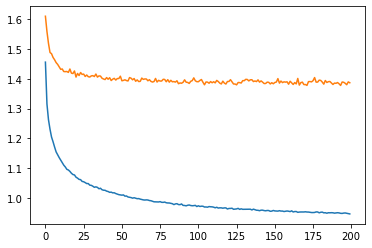

In [52]:
plt.plot(loss_train5)
plt.plot(loss_test5)
plt.show()

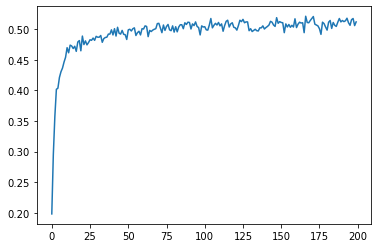

In [55]:
plt.plot(acc5)
plt.show()

In [56]:
print("Best accuracy: ",np.max(acc5)," Epoch: ", np.argmax(acc5))

Best accuracy:  0.5210356  Epoch:  166
